<!-- dom:TITLE: Theoretisch-Physikalisches Seminar -->
# Nichtlineare Dynamik und Strukturbildung
<!-- dom:AUTHOR: Philipp Hoevel, Saarland University -->
<!-- Author: --> **Philipp Hövel**, Saarland University

Date: **May 29, 2024**

### Tasks

  * Lorenz model
  * logistic map
  * Bernoulli map
  * tent map

### Importing helpful Python modules

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import pylab as pl

### Lorenz model
$$
  \dot x = -\sigma x + \sigma y \\
  \dot y = \rho x - y - x z \\
  \dot z = x y - \beta z,
$$
mit $\sigma=10$ und $\beta=8/3$.

In [2]:
# Lorenz
def F(X, t, rho):
    x, y, z = X
    return [-sigma*x + sigma*y,
            rho*x - y - x*z,
            x*y - beta*z]

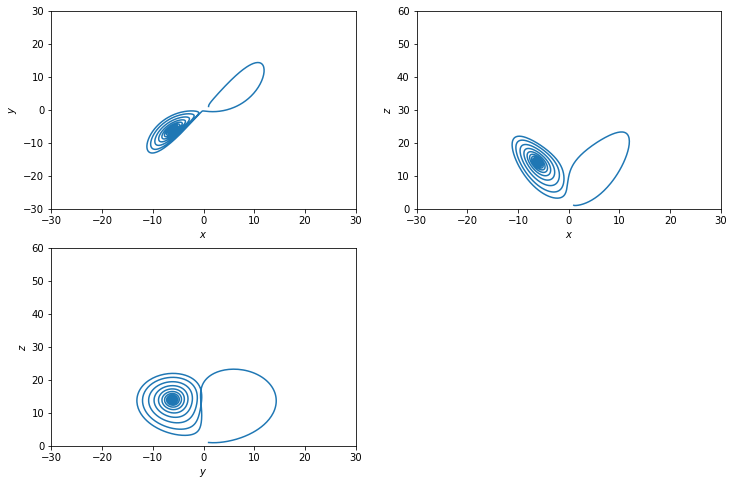

In [7]:
sigma = 10
beta = 8./3.

#rho = 9
rho = 15
#rho = 28

x0 = 1.
y0 = 1.
z0 = 1.

t = np.linspace(0, 100, 20001)
    
erg, info = odeint(F, (x0, y0, z0), t, args=(rho,), full_output=True)
x, y, z = erg.transpose()

xrange = 30
yrange = 30


fig = plt.figure(figsize=(12, 8))

pl.subplot(221)
pl.xlim(-xrange,xrange)
pl.ylim(-yrange,yrange)
pl.xlabel(r'$x$')
pl.ylabel(r'$y$')
pl.plot(x,y)

pl.subplot(222)
pl.xlim(-xrange,xrange)
pl.ylim(0,2.*yrange)
pl.xlabel(r'$x$')
pl.ylabel(r'$z$')
pl.plot(x,z)

pl.subplot(223)
pl.xlim(-xrange,xrange)
pl.ylim(0,2.*yrange)
pl.xlabel(r'$y$')
pl.ylabel(r'$z$')
pl.plot(y,z)


pl.show()

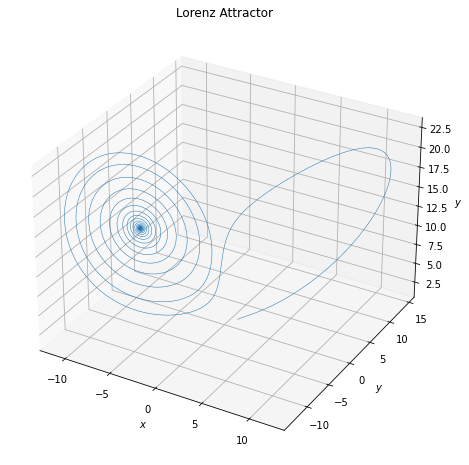

In [8]:
ax = plt.figure(figsize=(12, 8)).add_subplot(projection='3d')

ax.plot(x,y,z, lw=0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$y$')
ax.set_title("Lorenz Attractor")

plt.show()

### logistic map
$$
  x_n = r x (1-x)
$$
with $r\in[0,4]$.

In [9]:
def f(x, r):
    """the logistic map"""
    return r * x * (1.0 - x)

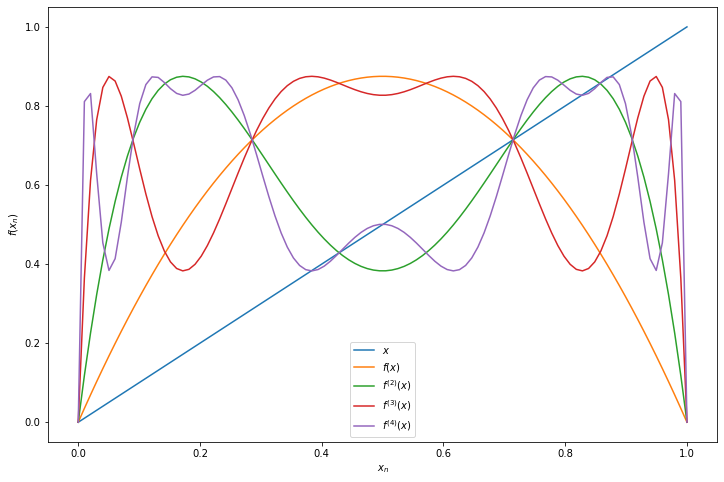

In [14]:
x = np.linspace(0,1,100)

r = 0.5
r = 1.0
r = 2.5
r = 3.5

fx = f(x, r)
f2x = f(fx,r)
f3x = f(f2x,r)
f4x = f(f3x,r)

plt.figure(figsize=(12, 8))

pl.xlabel(r'$x_n$')
pl.ylabel(r'$f(x_n)$')
pl.plot(x,x, label=r'$x$')
pl.plot(x,fx, label=r'$f(x)$')

pl.plot(x,f2x, label=r'$f^{(2)}(x)$')
pl.plot(x,f3x, label=r'$f^{(3)}(x)$')
pl.plot(x,f4x, label=r'$f^{(4)}(x)$')

pl.legend()
pl.show()

### Bernoulli map
$$
  x_n = (a x)  \mod 1
$$
with $a>0$.

In [15]:
def f_Ber(x, a):
    """the Bernoulli map"""
    return (a * x) % 1.0

def iterate(x0, n, a):
    """do n iterations"""
    for i in range(n):
        x0 = f_Ber(x0, a)
    return x0

def iterateArray(x0, n, a):
    """Do n Iterations and an array"""
    li = []
    for i in range(n):
        x0 = f_Ber(x0, a)
        li.append(x0)
    return np.array(li)

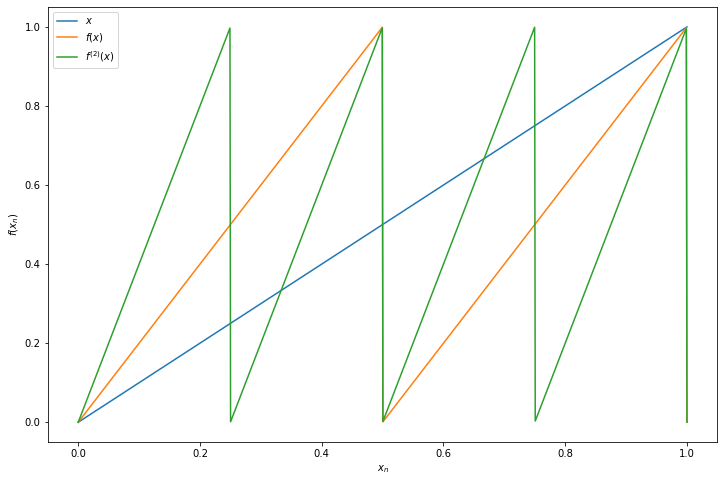

In [16]:
x = np.linspace(0,1,1000)

a = 2.

fx = f_Ber(x, a)
f2x = f_Ber(fx,a)

plt.figure(figsize=(12, 8))

pl.xlabel(r'$x_n$')
pl.ylabel(r'$f(x_n)$')
pl.plot(x,x, label=r'$x$')
pl.plot(x,fx, label=r'$f(x)$')

pl.plot(x,f2x, label=r'$f^{(2)}(x)$')


pl.legend()
pl.show()

Text(0, 0.5, '$x_n$')

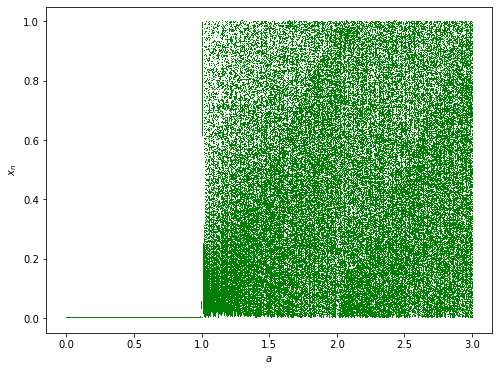

In [17]:
# a-interval of the bifurcation diagram
a_intervall = np.linspace(0, 3, 500)

fig = plt.figure(figsize=(8, 6))

for a in a_intervall:
    # Transiente laufen lassen
    x0 = iterate(0.123456789, 400, a)
    
    # Bifurkationsdiagramm erstellen
    xs = iterateArray(x0, 300, a)
    
    pl.plot(np.ones(len(xs)) * a, xs, 'g,')

pl.xlabel(r'$a$')
pl.ylabel(r'$x_n$')
#pl.xlim(3.5, 4)
#pl.ylim(-1, 1)
#pl.legend(loc='lower left')

### tent map
$$
  x_n = \mu \min\{x, 1-x\}
$$
with $\mu\in[0,2]$.

In [18]:
def f_tent(x, mu):
    """the tent map"""
    return mu * np.minimum(x, 1.-x)

def iterate(x0, n, mu):
    """do n iterations"""
    for i in range(n):
        x0 = f_tent(x0, mu)
    return x0

def iterateArray(x0, n, mu):
    """Do n Iterations and an array"""
    li = []
    for i in range(n):
        x0 = f_tent(x0, mu)
        li.append(x0)
    return np.array(li)

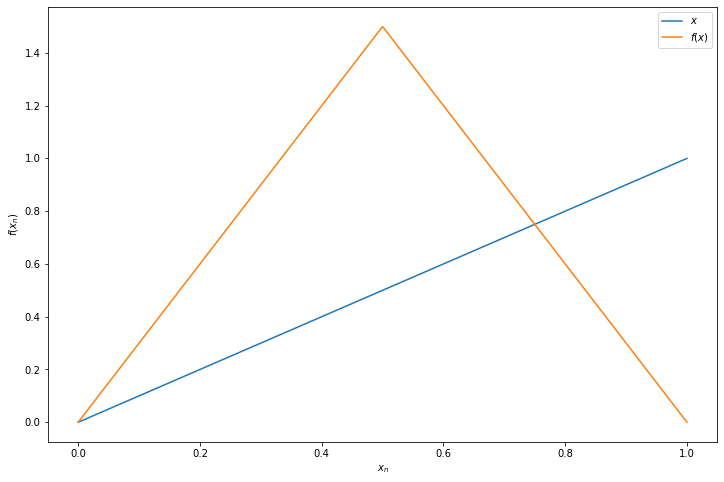

In [19]:
x = np.linspace(0,1,1000)

mu = 1.

fx = f_tent(x, a)

plt.figure(figsize=(12, 8))

pl.xlabel(r'$x_n$')
pl.ylabel(r'$f(x_n)$')
pl.plot(x,x, label=r'$x$')
pl.plot(x,fx, label=r'$f(x)$')

pl.legend()
pl.show()

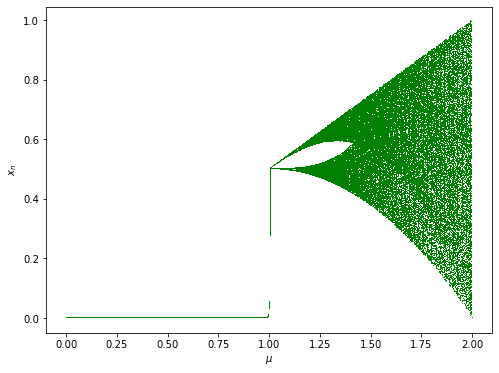

In [20]:
# a-interval of the bifurcation diagram
mu_intervall = np.linspace(0, 2, 500)

fig = plt.figure(figsize=(8, 6))

for mu in mu_intervall:
    # Transiente laufen lassen
    x0 = iterate(0.123456789, 400, mu)
    
    # Bifurkationsdiagramm erstellen
    xs = iterateArray(x0, 300, mu)
    
    pl.plot(np.ones(len(xs)) * mu, xs, 'g,')

pl.xlabel(r'$\mu$')
pl.ylabel(r'$x_n$')
pl.show()

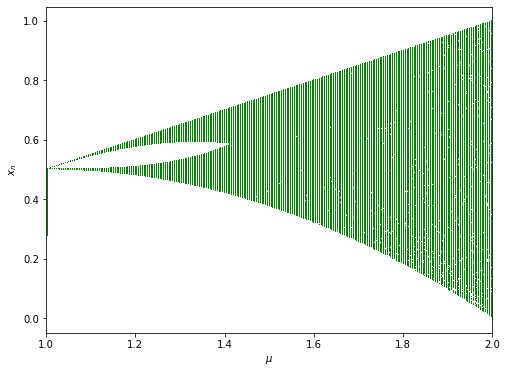

In [21]:
# a-interval of the bifurcation diagram
mu_intervall = np.linspace(0, 2, 500)

fig = plt.figure(figsize=(8, 6))

for mu in mu_intervall:
    # Transiente laufen lassen
    x0 = iterate(0.123456789, 400, mu)
    
    # Bifurkationsdiagramm erstellen
    xs = iterateArray(x0, 1000, mu)
    
    pl.plot(np.ones(len(xs)) * mu, xs, 'g,')

pl.xlabel(r'$\mu$')
pl.ylabel(r'$x_n$')
pl.xlim(1,2)
pl.show()